## Import packages

In [1]:
from cartopy import config
import cartopy
import cartopy.crs as ccrs
import cmocean
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

## Identifying co-occurring events

In [2]:
lat = -31.0
lon = 153.25

In [3]:
mhw = xr.open_dataarray('/g/data/e14/cp3790/Charuni/Tasmania/aus-ocean-sev-2.nc').sel(latitude=lat, longitude=lon, method='nearest')
thw = xr.open_dataarray('/g/data/e14/cp3790/Charuni/Tasmania/aus-coastal-sev.nc').sel(latitude=lat, longitude=lon, method='nearest')

In [4]:
thw_ = xr.where(thw>1, 1, 0)
mhw_ = xr.where(mhw>1, 1, 0)
add = thw_ + mhw_
co = xr.where(add==2, 1, 0)

## MSLP

In [9]:
# MSLP absolute values 

ds = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ERA5-MSL/era5_dailymsl_*.nc').sel(longitude=slice(90, 180), latitude=slice(0, -60))
mslp = ds.dmsl/100
mslp.attrs['units'] = 'hPa'

In [10]:
composite_co = mslp.where((thw>1) & (mhw>1), drop=True) #co-occurring events 
composite_thw = mslp.where((thw>1) & (co==0), drop=True) #non co-occurring THW events

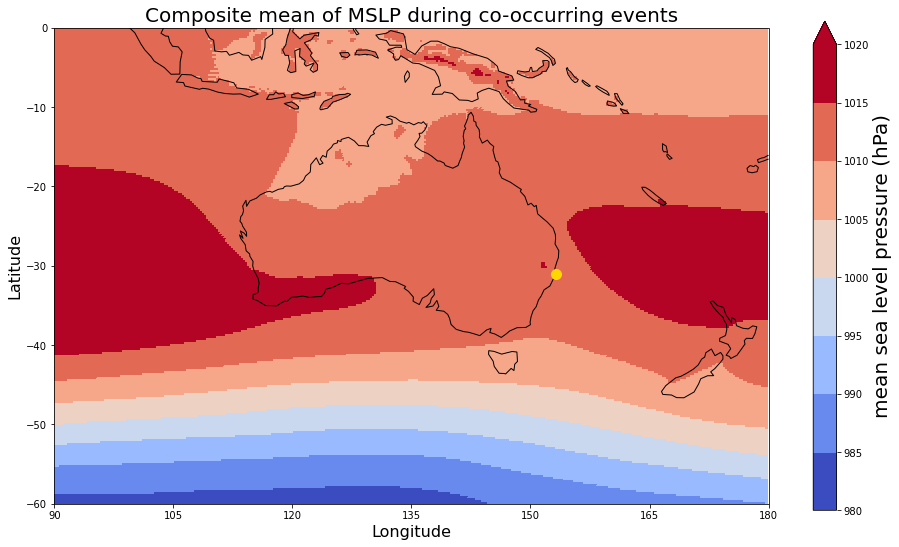

In [13]:
fig, ax = plt.subplots(figsize=(16,9))    
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

ploteo=composite_co.mean(dim='time').plot(
            cmap=plt.cm.get_cmap('coolwarm', 8), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples
            vmin=980, vmax=1020, # Minimum and maximum values of the colormap
       )
ploteo.colorbar.ax.set_ylabel('mean sea level pressure (hPa)',fontsize=20)
ax.coastlines()
ax.set_extent([90, 180, -60, 0],crs=ccrs.PlateCarree())
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Composite mean of MSLP during co-occurring events', fontsize=20)
plt.plot(153.25, -31.0,  markersize=10, marker='o', color='gold')
plt.show()

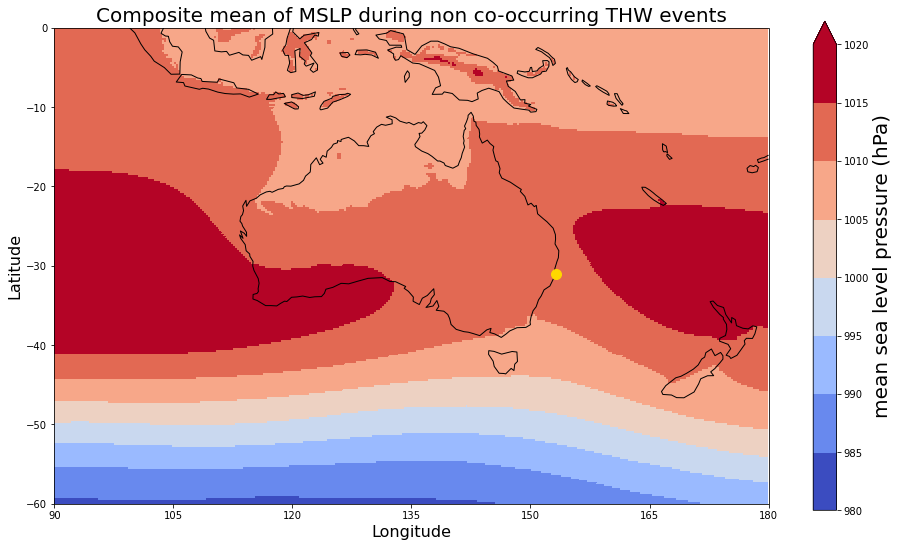

In [14]:
fig, ax = plt.subplots(figsize=(16,9))    
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xticks([90, 105, 120, 135, 150, 165, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -50, -40, -30, -20, -10, 0], crs=ccrs.PlateCarree())

ploteo=composite_thw.mean(dim='time').plot(
            cmap=plt.cm.get_cmap('coolwarm', 8), # Specify the colourmap of interest and also the number of discrete levels. I have 5, corresponding to the number of MHW severity categories. See https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html for examples
            vmin=980, vmax=1020, # Minimum and maximum values of the colormap
       )
ploteo.colorbar.ax.set_ylabel('mean sea level pressure (hPa)',fontsize=20)
ax.coastlines()
ax.set_extent([90, 180, -60, 0],crs=ccrs.PlateCarree())
plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('Composite mean of MSLP during non co-occurring THW events', fontsize=20)
plt.plot(153.25, -31.0,  markersize=10, marker='o', color='gold')
plt.show()